In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 

df=pd.read_csv('Food_Delivery_Times.csv')
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [111]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [112]:
df.tail()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [113]:
df.shape

(1000, 9)

In [114]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [115]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [116]:
df.dtypes

Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [117]:
v1=df['Weather'].value_counts()
v1

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

Text(0.5, 1.0, 'Weather value counts')

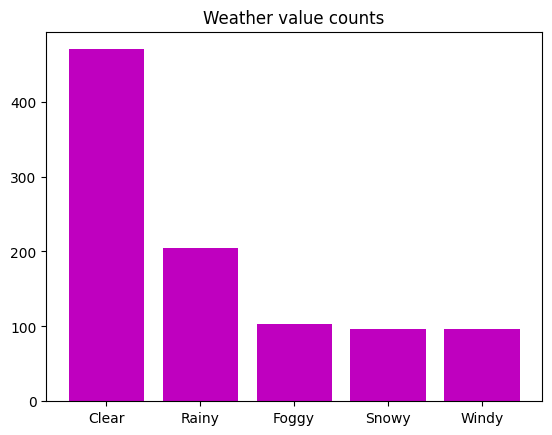

In [118]:
plt.bar(v1.index,v1.values,color='m')
plt.title('Weather value counts')

In [119]:
v2=df['Traffic_Level'].value_counts()
v2

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

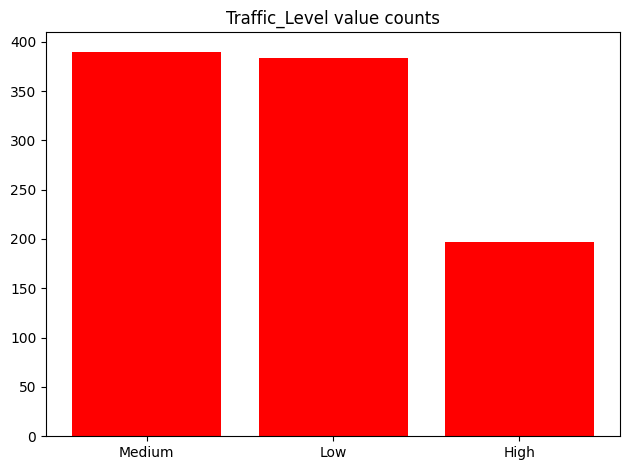

In [120]:
plt.bar(v2.index,v2.values,color='r')
plt.title('Traffic_Level value counts')
plt.tight_layout()

In [121]:
v3=df['Time_of_Day'].value_counts()
v3

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

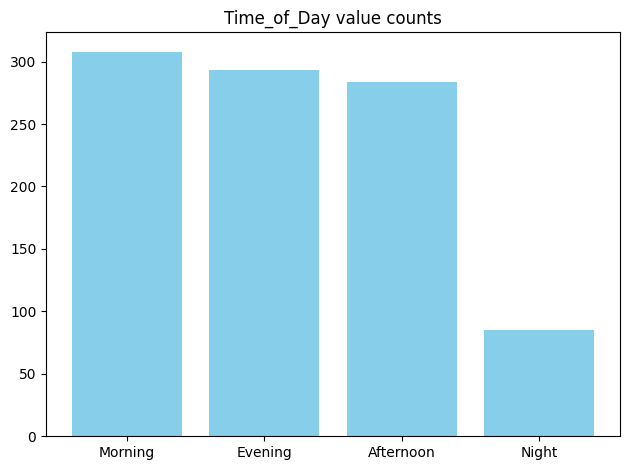

In [122]:
plt.bar(v3.index,v3.values,color='skyblue')
plt.title('Time_of_Day value counts')
plt.tight_layout()

In [123]:
v4=df['Vehicle_Type'].value_counts()
v4

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

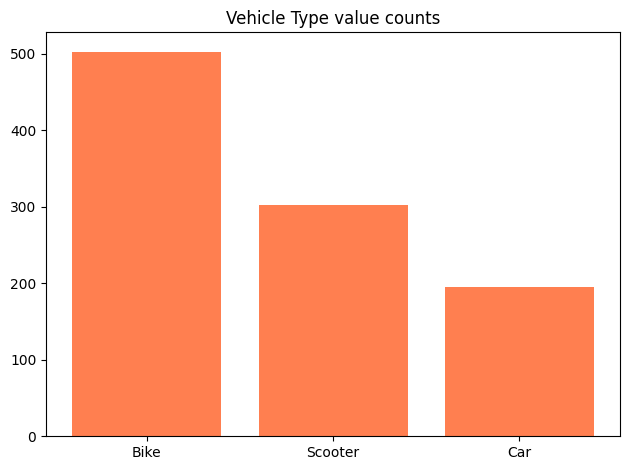

In [124]:
plt.bar(v4.index,v4.values,color='coral')
plt.title('Vehicle Type value counts')
plt.tight_layout()

In [125]:
df['Courier_Experience_yrs'].unique()

array([ 1.,  2.,  5.,  9.,  6.,  4.,  7., nan,  3.,  8.,  0.])

In [126]:
#handling missing values

df['Weather'].fillna('Unknown',inplace=True)
df['Traffic_Level'].fillna('Unknown',inplace=True)
df['Time_of_Day'].fillna('Unknown',inplace=True)

df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mode() [0],inplace=True)

df.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

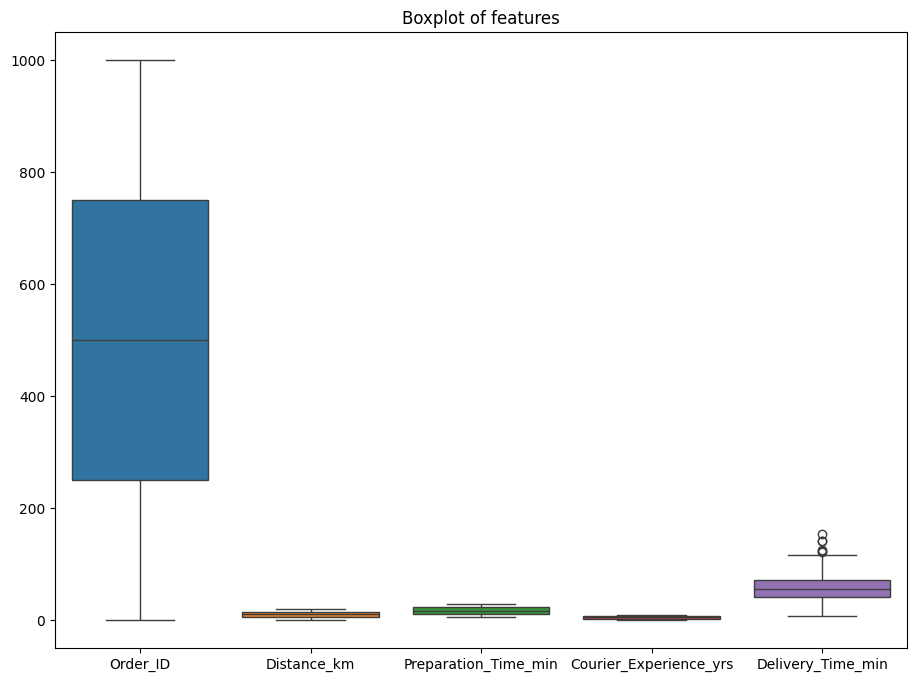

In [127]:
num_cols=df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(11,8))
sb.boxplot(data=df[num_cols])
plt.title('Boxplot of features')
plt.show()

In [128]:
#get dummies Encoding

df1=pd.get_dummies(df[['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']],dtype=int,drop_first=True)
df1

,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Unknown,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Unknown,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Vehicle_Type_Car,Vehicle_Type_Scooter
0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,1,0,0,0,1,0
996,0,1,0,0,0,1,0,0,0,1,0,0,0,1
997,0,0,1,0,0,0,0,0,1,0,0,0,0,1
998,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [129]:
df1.shape

(1000, 14)

In [130]:
dfe=pd.concat([df,df1],axis=1)
dfe

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,...,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Unknown,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,0,...,1,1,0,0,0,0,0,0,0,1
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,0,...,0,0,1,0,1,0,0,0,0,0
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,1,...,0,1,0,0,0,0,1,0,0,1
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,0,...,0,0,1,0,0,0,0,0,0,1
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54,0,...,0,0,0,0,1,0,0,0,1,0
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71,0,...,0,1,0,0,0,1,0,0,0,1
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81,0,...,0,0,0,0,1,0,0,0,0,1
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55,0,...,0,1,0,0,0,0,0,0,0,0


In [131]:
dfe.shape

(1000, 23)

In [132]:
dfe.drop(['Order_ID','Weather','Traffic_Level','Time_of_Day','Vehicle_Type'],axis=1,inplace=True)
dfe

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Unknown,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Unknown,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,16.42,20,2.0,84,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,9.52,28,1.0,59,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,7.44,5,1.0,37,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,19.03,16,5.0,68,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,54,0,0,0,0,0,0,0,0,1,0,0,0,1,0
996,16.28,8,9.0,71,0,1,0,0,0,1,0,0,0,1,0,0,0,1
997,15.62,26,2.0,81,0,0,1,0,0,0,0,0,1,0,0,0,0,1
998,14.17,8,0.0,55,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [133]:
dfe.shape

(1000, 18)

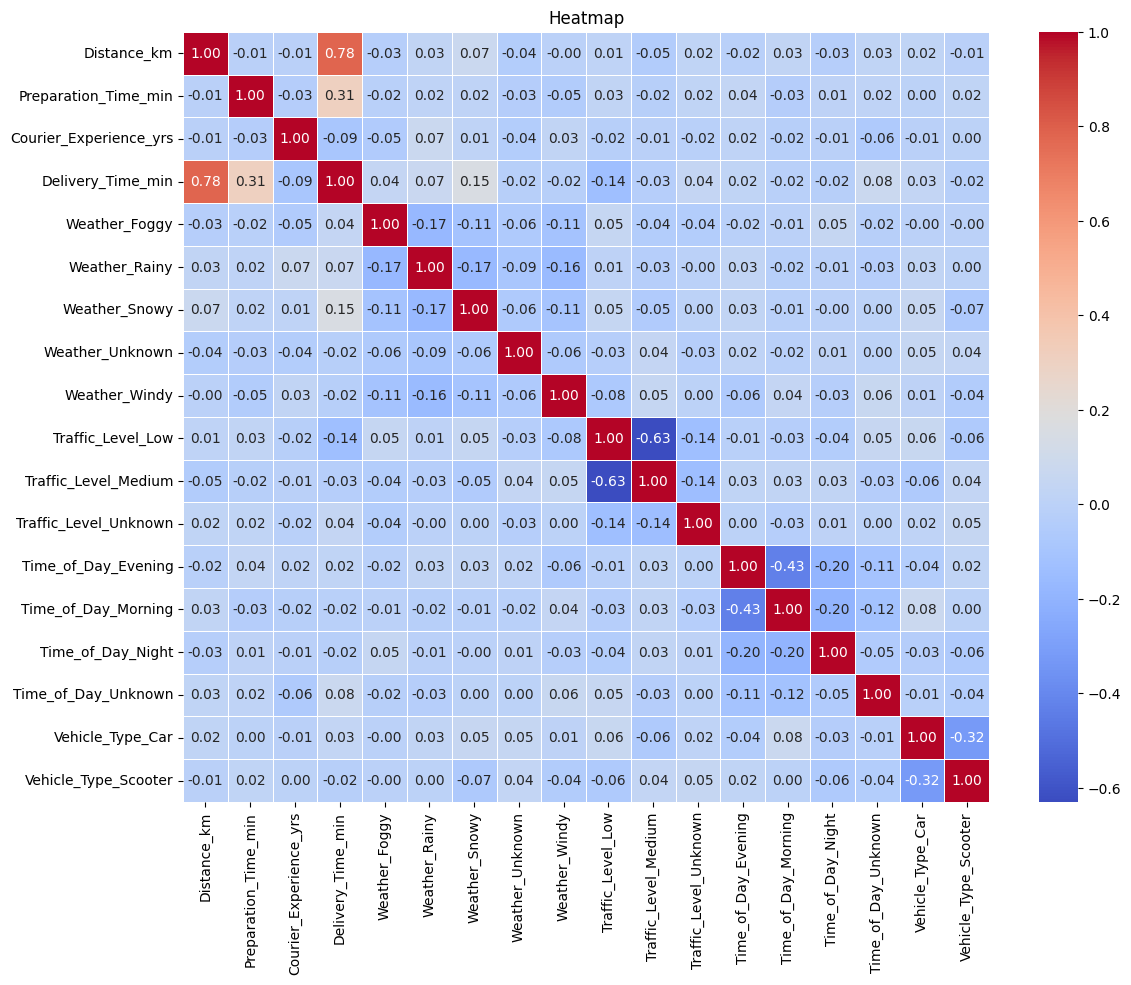

In [134]:
corr_mtx=dfe.corr()
plt.figure(figsize=(13,10))
sb.heatmap(corr_mtx,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Heatmap")
plt.show()

In [135]:
x=dfe.drop(['Delivery_Time_min'],axis=1)
x

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Unknown,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Unknown,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,16.42,20,2.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,9.52,28,1.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,7.44,5,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,19.03,16,5.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
996,16.28,8,9.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
997,15.62,26,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
998,14.17,8,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [136]:
y=df['Delivery_Time_min']
y

0      43
1      84
2      59
3      37
4      68
       ..
995    54
996    71
997    81
998    55
999    58
Name: Delivery_Time_min, Length: 1000, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Unknown,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Traffic_Level_Unknown,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Vehicle_Type_Car,Vehicle_Type_Scooter
541,16.30,12,1.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
440,7.67,9,2.0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
482,19.41,11,8.0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
422,12.74,18,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
778,11.62,9,8.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,17.59,24,6.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
270,9.39,14,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
860,16.38,6,2.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
435,16.73,9,7.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [138]:
y_train

541    100
440     31
482     62
422     67
778     33
      ... 
106     69
270     37
860     51
435     71
102     28
Name: Delivery_Time_min, Length: 700, dtype: int64

In [139]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 35.02274111,  67.93969709,  45.46881669,  48.66493717,
        84.18552811,  32.47801911,  70.04638792,  31.58053364,
        38.57827524,  77.22208744,  74.0107444 ,  59.76843827,
        36.0198178 ,  75.92924757,  88.09560003,  81.37333558,
        32.37453629,  68.17831459,  47.23148277,  59.52557442,
        87.71270222,  27.74641234,  81.59111516,  78.36105953,
        60.90040921,  34.19150677,  85.05923441,  25.75956827,
        50.57147111,  66.51803095,  69.72925784,  16.69386472,
        60.35337617,  38.27595299,  66.92341985,  20.17773986,
        62.14523438,  52.8041017 ,  48.92817877,  75.19407756,
        75.45700194,  31.59643094,  80.17278272,  67.41508913,
        36.87554062,  14.21859187,  90.23843255,  82.07300735,
        77.32829872,  26.62166918,  74.86908777,  64.00878896,
        38.10879779,  79.81646569,  57.37975516,  51.84862169,
        76.48544418,  81.80197622,  65.97398592,  92.39829122,
        49.35236161,  35.60340071,  50.27455381,  47.42

In [140]:
y_test

521    32
737    68
740    39
660    44
411    85
       ..
468    46
935    63
428    37
7      46
155    66
Name: Delivery_Time_min, Length: 300, dtype: int64

In [141]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
521,32,35.022741,-3.022741
737,68,67.939697,0.060303
740,39,45.468817,-6.468817
660,44,48.664937,-4.664937
411,85,84.185528,0.814472
...,...,...,...
468,46,39.634027,6.365973
935,63,60.244498,2.755502
428,37,37.794549,-0.794549
7,46,63.841781,-17.841781


In [142]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

mape=mean_absolute_percentage_error(y_test,y_pred)
mape

0.10592137204933598

In [143]:
sc=r2_score(y_test,y_pred)
sc

0.8333055491648679